In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Bring in data.
df = pd.read_json("distinct_lyric_df.json")
df.head()

,Track Name,Artist,Track ID,Genres,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Lyrics,Distinct Word Count
0,The Real Slim Shady,Eminem,3yfqSUWxFvZELEM4PmlwIR,1,0.0302,0.949,0.661,0.000000,0.0454,-4.244,0.0572,104.504,0.760,\nMay I have your attention please\nMay I hav...,363
1,MotorSport,Migos,4wFjTWCunQFKtukqrNijEt,1,0.0305,0.904,0.518,0.000000,0.3250,-5.320,0.1830,137.996,0.188,\nYeah woo yeah skrrt\nM-M-M-Murda\n\n \nMoto...,407
2,In Da Club,50 Cent,5Mcvgt2GbxxCp6cz3Kfjey,1,0.3250,0.906,0.663,0.000000,0.0883,-3.955,0.3550,90.042,0.847,\n\n \nGo go\nGo go go go\nGo shawty it's you...,227
3,Gangsta's Paradise,Coolio,1DIXPcTDzTj8ZMHt3PDt8p,1,0.0655,0.647,0.514,0.000000,0.3980,-10.050,0.0593,79.975,0.386,\n\n \nAs I walk through the valley of the sh...,179
4,rockstar,Post Malone,19bX4zmC2zDben2ldhoRB3,1,0.1450,0.594,0.507,0.000871,0.1320,-6.141,0.0816,159.729,0.137,\nHahahahaha\nTank God\nAyy ayy\n\n \nI've be...,198


In [3]:
#Drop unrelated labels and begin initializing data, 'preX' is preprocessing step for X features.
preX = ['Track Name','Artist','Track ID', 'Lyrics']
preX = df.drop(preX, axis=1)

#Initialize y as target
y = df['Genres'].copy()
preX = preX.drop(columns = 'Genres')

#Group targets to 4 total clusters
for i in range(1,9):
    y.loc[y==2*i] = 2*i-1
y.head(50)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    3
31    3
32    3
33    3
34    3
35    3
36    3
37    3
38    3
39    3
40    3
41    3
42    3
43    3
44    3
45    3
46    3
47    3
48    3
49    3
Name: Genres, dtype: int64

In [4]:
# Scale columns individually to sit in the given range on the training set.
scaler = MinMaxScaler()
scaler.fit(preX)
transformed_data = scaler.transform(preX)
print(transformed_data)

[[0.03911033 1.         0.47021944 ... 0.26899643 0.77233861 0.25457103]
 [0.03949894 0.94117647 0.2460815  ... 0.51754744 0.16096622 0.28551336]
 [0.42097913 0.94379085 0.47335423 ... 0.16167096 0.86532706 0.15893108]
 ...
 [0.02304801 0.74248366 0.88401254 ... 0.33596539 0.69965797 0.10970464]
 [0.18133962 0.93333333 0.49373041 ... 0.59172239 0.75309962 0.        ]
 [0.00189497 0.43006536 0.68181818 ... 0.76260306 0.32877298 0.07172996]]


In [5]:
X = pd.DataFrame(
    transformed_data,
    columns=preX.columns
)
X.head()

,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Distinct Word Count
0,0.039110,1.000000,0.470219,0.000000,0.021628,0.924252,0.080764,0.268996,0.772339,0.254571
1,0.039499,0.941176,0.246082,0.000000,0.333333,0.868350,0.401274,0.517547,0.160966,0.285513
2,0.420979,0.943791,0.473354,0.000000,0.069454,0.939266,0.839490,0.161671,0.865327,0.158931
3,0.084836,0.605229,0.239812,0.000000,0.414716,0.622610,0.086115,0.086962,0.372595,0.125176
4,0.187816,0.535948,0.228840,0.001057,0.118172,0.825696,0.142930,0.678832,0.106456,0.138537


In [6]:
# Use sklearn to split, train, and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=8)
#DTC = DecisionTreeClassifier()
#DTC.n_classes_ = 4
#DTC.fit(X_train,y_train)
#predictions = DTC.predict(X_test)
RFC = RandomForestClassifier()
RFC.n_classes_ = 4
RFC.fit(X_train, y_train)
predictions = RFC.predict(X_test)

In [7]:
#Output accuracy
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, predictions)
report = classification_report(y_test, predictions)
score = accuracy_score(y_test, predictions)
print(f'Confusion Matrix:\n{result}\n\nClassification Report:\n\n{report}\n Accuracy:{score}')

Confusion Matrix:
[[8 0 0 0]
 [0 5 1 1]
 [1 0 5 0]
 [2 1 1 5]]

Classification Report:

              precision    recall  f1-score   support

           1       0.73      1.00      0.84         8
           3       0.83      0.71      0.77         7
           5       0.71      0.83      0.77         6
           7       0.83      0.56      0.67         9

    accuracy                           0.77        30
   macro avg       0.78      0.78      0.76        30
weighted avg       0.78      0.77      0.76        30

 Accuracy:0.7666666666666667


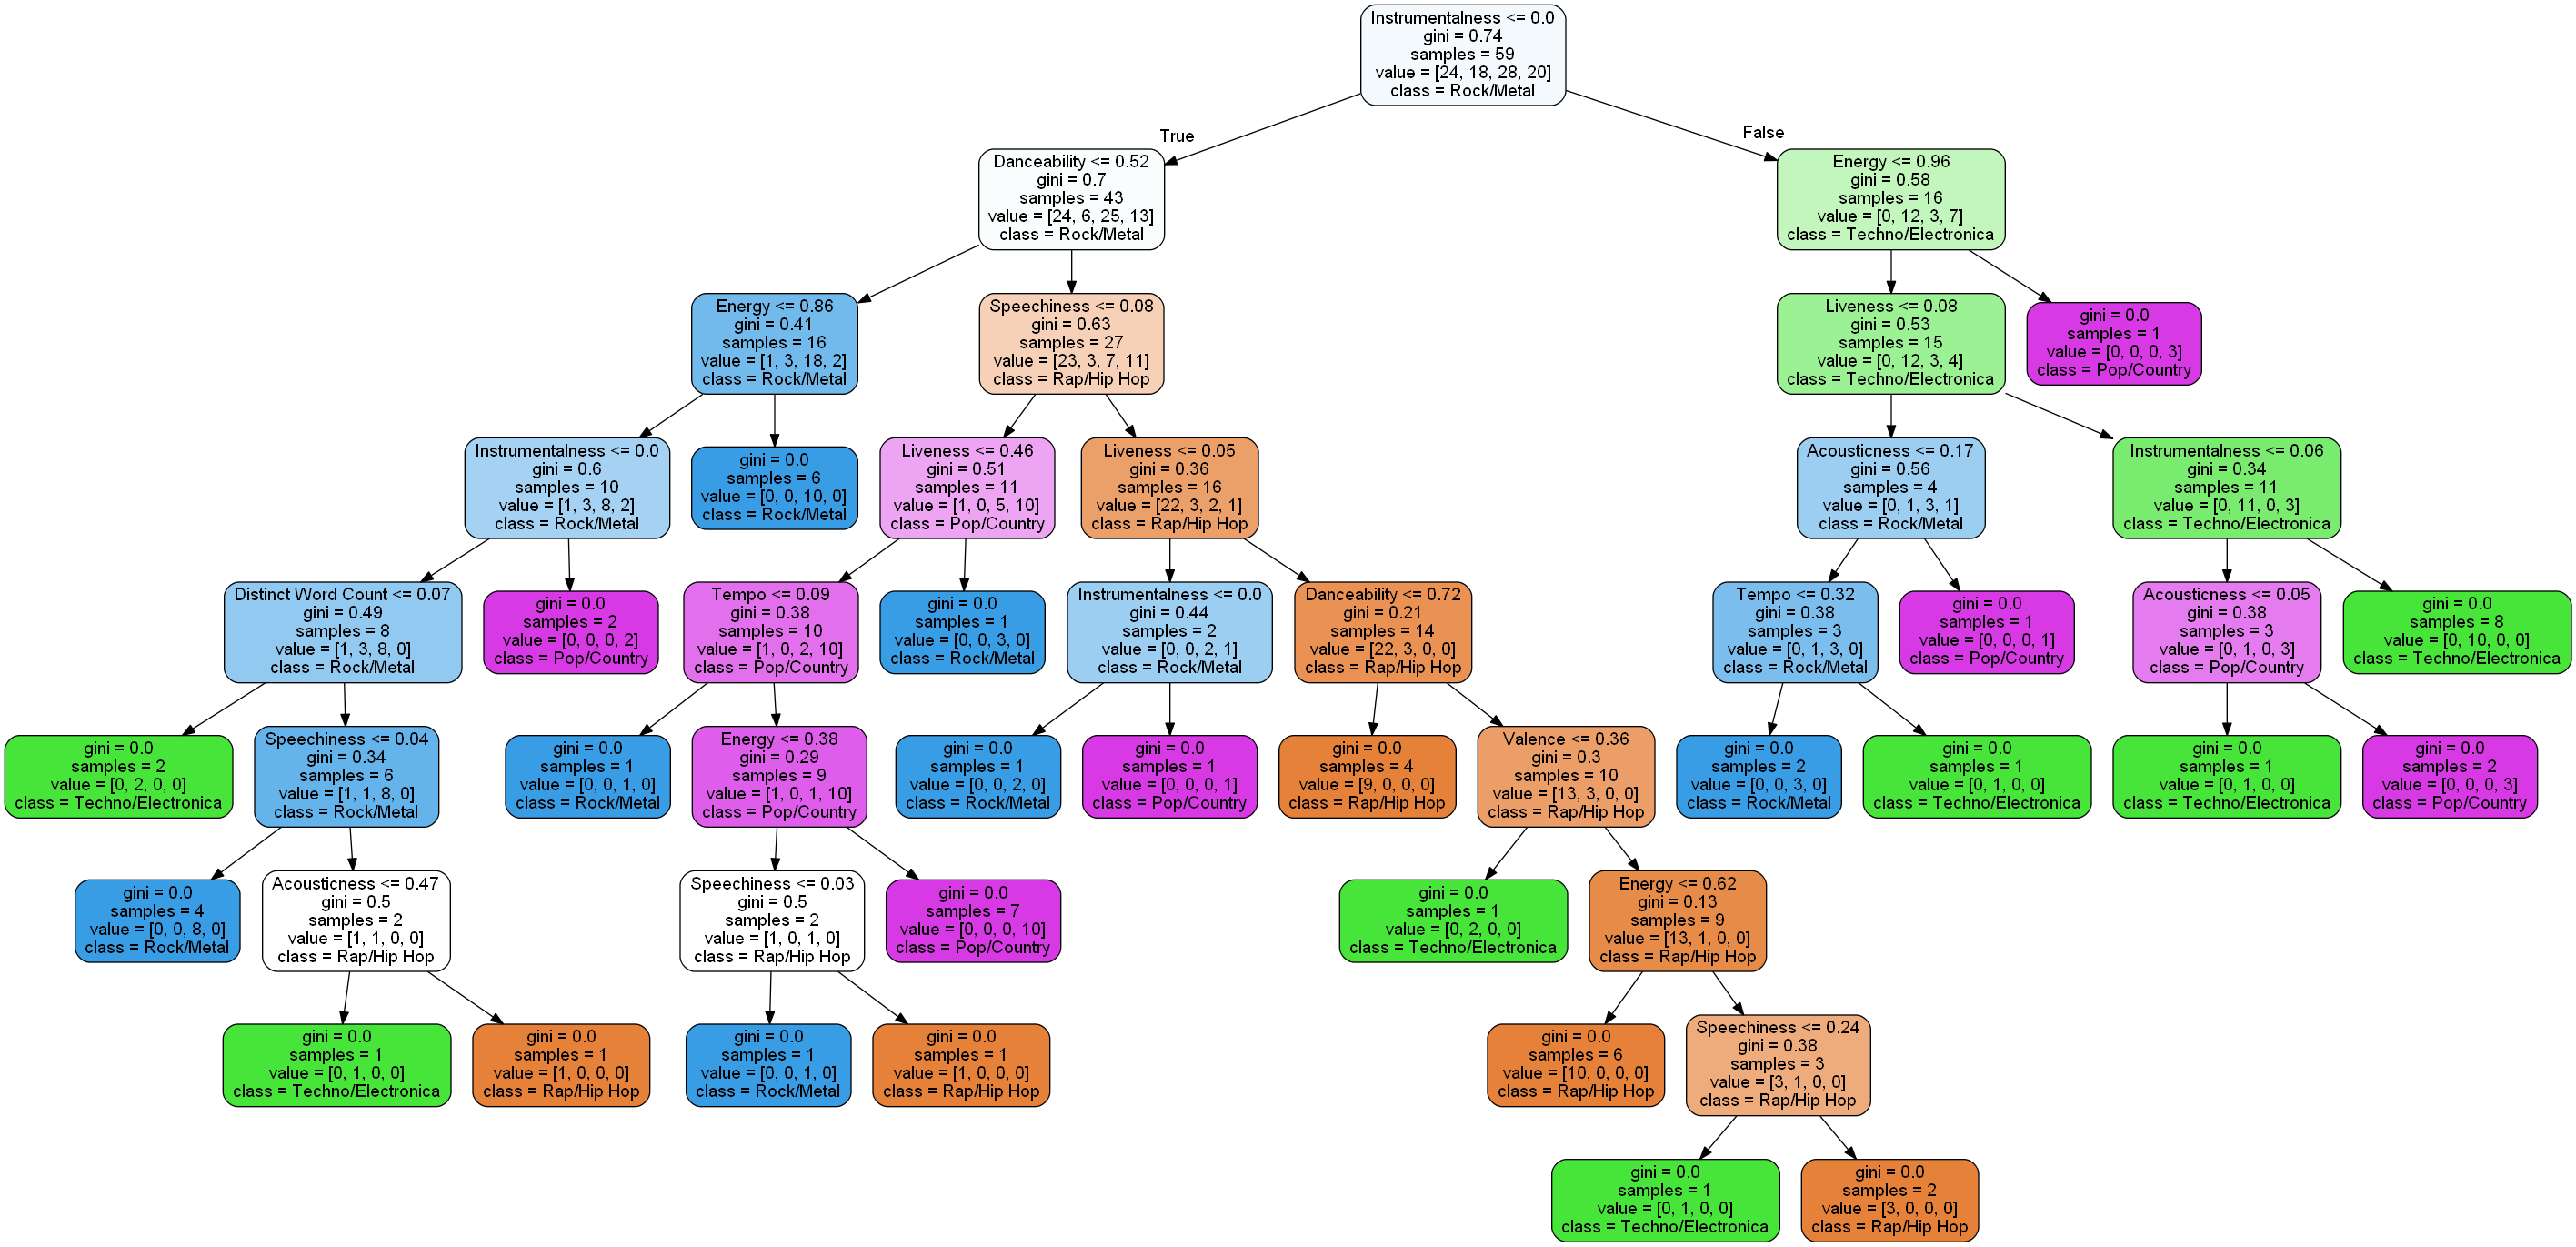

In [9]:
#Credits to Will Koerhsen for the method of visualizing the decision tree, code can be found at:
#https://towardsdatascience.com/how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c
#Requires pydot module


#Export as dot file
from sklearn.tree import export_graphviz
export_graphviz(RFC.estimators_[4], out_file='tree.dot', 
                feature_names = list(X.columns.values),
                class_names = ['Rap/Hip Hop', 'Techno/Electronica', 'Rock/Metal', 'Pop/Country'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
import pydot
(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')
#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

#Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')